<a href="https://colab.research.google.com/github/luilambu/Talleres-Analitica-de-Neg-2022-2/blob/main/taller_2%2C_pronostico_de_ventas_Holt_Winters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TALLER **

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48 entries, 2018-09-01 to 2022-08-01
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ventas   48 non-null     float64
dtypes: float64(1)
memory usage: 768.0 bytes
None
                       ExponentialSmoothing Model Results                       
Dep. Variable:                  Ventas    No. Observations:                   48
Model:             ExponentialSmoothing   SSE                              1.248
Optimized:                         True   AIC                           -147.171
Trend:                             None   BIC                           -120.974
Seasonal:                Multiplicative   AICC                          -129.623
Seasonal Periods:                    12   Date:                 Tue, 15 Nov 2022
Box-Cox:                          False   Time:                         03:24:09
Box-Cox Coeff.:                    None                           

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


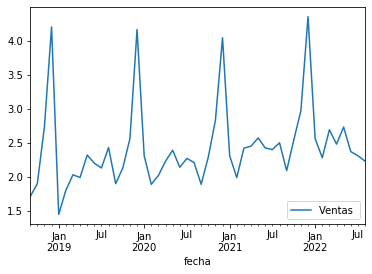

In [ ]:

import pandas as pd
import statsmodels as sm
from matplotlib import pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing as HWES
datos= pd.read_excel("Tienda oficial.xlsx",index_col=[0])
print(datos.info())
datos.plot()
datos_train=datos.iloc[:-5]
#print(datos_train)
datos_test=datos.iloc[-5:]
#print(datos_test)
modelo= HWES(datos,seasonal_periods=12, seasonal='mul')
ajuste = modelo.fit(optimized=True,use_brute=True)
print(ajuste.summary())
pronostico= ajuste.forecast(steps=9)
print(pronostico)

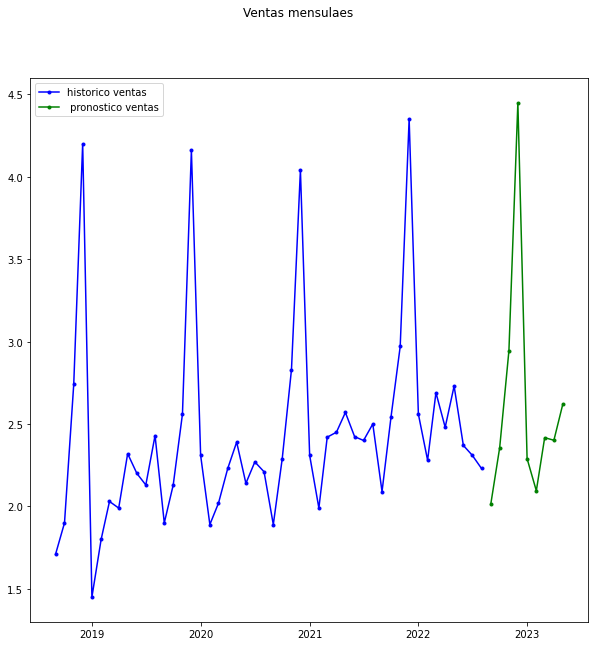

In [ ]:
fig= plt.figure(figsize=(10,10))
fig.suptitle("Ventas mensulaes")
past, =plt.plot(datos.index, datos ,'b.-', label="historico ventas")
pronos, =plt.plot( pronostico ,'g.-', label=" pronostico ventas")
plt.legend(handles=[past, pronos,])
plt.show()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 52 entries, 2018-09-01 to 2022-12-01
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Ventas isla  52 non-null     float64
dtypes: float64(1)
memory usage: 832.0 bytes
None
                       ExponentialSmoothing Model Results                       
Dep. Variable:              Ventas isla   No. Observations:                   48
Model:             ExponentialSmoothing   SSE                            336.897
Optimized:                         True   AIC                            121.532
Trend:                             None   BIC                            147.729
Seasonal:                      Additive   AICC                           139.080
Seasonal Periods:                    12   Date:                 Tue, 15 Nov 2022
Box-Cox:                          False   Time:                         03:24:25
Box-Cox Coeff.:                    None               

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


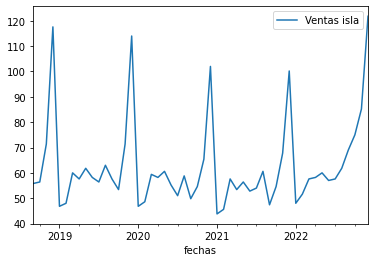

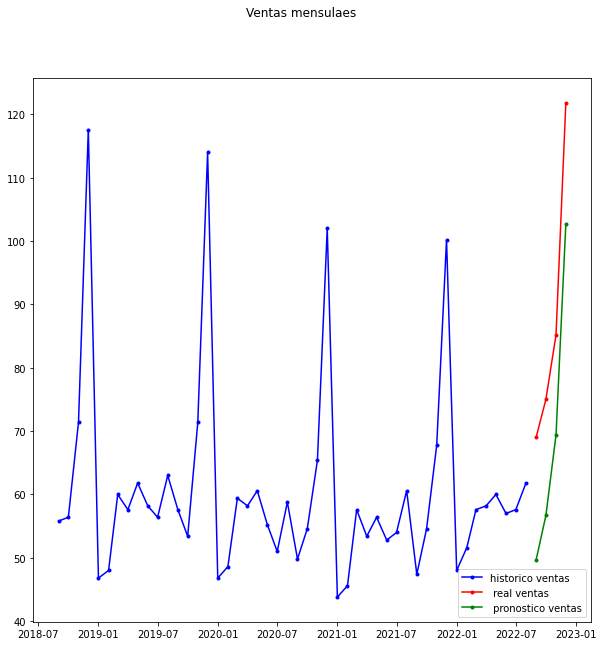

In [ ]:
datosisla= pd.read_excel("ventas isla.xlsx",index_col=[0])
print(datosisla.info())
datosisla.plot()
datos_trainisla=datosisla.iloc[:-4]
#print(datos_train)
datos_testisla=datosisla.iloc[-4:]
#print(datos_test)
modeloisla= HWES(datos_trainisla,seasonal_periods=12,seasonal='add')
ajusteisla = modeloisla.fit(optimized=True,use_brute=True)
print(ajusteisla.summary())
pronosticoisla= ajusteisla.forecast(steps=4)
print(pronosticoisla)
fig= plt.figure(figsize=(10,10))
fig.suptitle("Ventas mensulaes ")
past, =plt.plot(datos_trainisla.index, datos_trainisla ,'b.-', label="historico ventas")
future, =plt.plot(datos_testisla.index, datos_testisla ,'r.-', label=" real ventas")
pronos, =plt.plot(datos_testisla.index, pronosticoisla ,'g.-', label=" pronostico ventas")
plt.legend(handles=[past, future, pronos,])
plt.show()